# 教女友学习机器学习0X01——多变量线性回归、特征缩放与多项式回归

上一篇教程只讲了非常基础的内容，线性回归其实高中也学习过了，这一次，我们会略微上升一点难度，我们依然使用Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)的数据。  

首先导入要用的包：

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
#为了在jupyter上画图加上这句话
%matplotlib inline
from scipy import optimize

引入我们要用的数据

In [3]:
data=np.loadtxt('ex1data2.txt',delimiter=',')
print(data[0:10,:])

[[  2.10400000e+03   3.00000000e+00   3.99900000e+05]
 [  1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  2.40000000e+03   3.00000000e+00   3.69000000e+05]
 [  1.41600000e+03   2.00000000e+00   2.32000000e+05]
 [  3.00000000e+03   4.00000000e+00   5.39900000e+05]
 [  1.98500000e+03   4.00000000e+00   2.99900000e+05]
 [  1.53400000e+03   3.00000000e+00   3.14900000e+05]
 [  1.42700000e+03   3.00000000e+00   1.98999000e+05]
 [  1.38000000e+03   3.00000000e+00   2.12000000e+05]
 [  1.49400000e+03   3.00000000e+00   2.42500000e+05]]


我们发现数据不一样了，从两列变到三列了，前两列是变量（特征，features），也就是我们所说的x，第三列是y，其实看看图，我们还是能发现一些规律的：

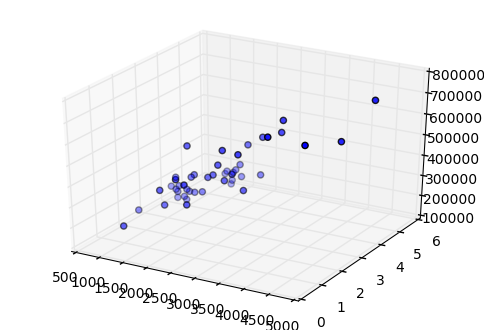

In [4]:
X=data[:,0:2]
y=data[:,2]
m=y.size
#plt.axes([0,0,1,1])
ax=plt.subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y)

貌似我们能用$h_{\theta}(x) = \theta _{0}x_{0}+\theta _{1}x_{1}+\theta _{2}x_{2}$来解决问题，先把数据整理好：

In [5]:
X=np.c_[np.ones(m),X]

接下来，开始上一次教程的前两个步骤，设计预测函数、设计代价函数：

In [6]:
def hypothesis(theta,X):
    return np.dot(X,theta.T)

def computer_cost(theta,X,y):
    return np.sum((y-hypothesis(X,theta))**2)/2/m

看到了没有，矩阵运算就是这么简洁，你变量再多，对我而言就是矩阵相乘，最后来一番优化：

In [7]:
from scipy import optimize
result=optimize.basinhopping(computer_cost,(1,1,1),stepsize=0.1,niter=100,\
                             minimizer_kwargs={'method':'L-BFGS-B','args':(X,y)})
print(result.x)

[ 87975.34440304    139.21220273  -8252.66947329]


看看效果如何：

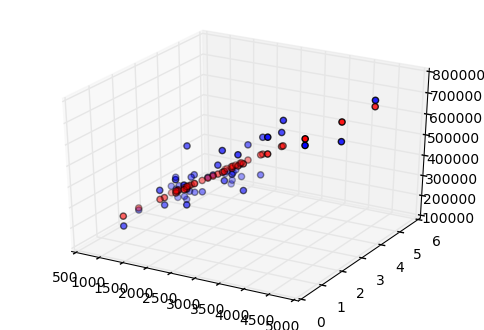

In [8]:
theta=result.x
ax=plt.subplot(111,projection='3d')
ax.scatter(X[:,1],X[:,2],y)
h=hypothesis(theta,X)
ax.scatter(X[:,1],X[:,2],h,c='r')

单一幅静态图可能看不清，来张动图看看：![三维动图](./三维动图.gif)  
可以明显看到，红色的直线拟合得都挺不错的。

## 特征缩放
我发现，如果不提梯度下降、优化算法，说到特征缩放这件事还挺别扭的，所以Andrew Ng在前面说梯度下降还是有道理的，这里简单说一下吧，对于一些优化算法（尤其是基本的），如果不同维度（变量、特征）的数值范围差异很大，就比如我们上面的一个三维图，作为X的2个维度分别是几和几千，如此大的差异如果用梯度下降，会使得不同方向的下降速度差异很大，收敛速度慢很多，需要更多的迭代才能达到较好的效果，因此需要把不同的特征缩放到同一个范围内，一般是控制在±1左右，当然，变量中极个别数超了也没什么关系。通常我们用的缩放公式是：  
$x=\frac{x-\mu }{\sigma }$  
其中$\mu$代表这个维度的均值，$\sigma$代表这个维度的标准差  
我们先来定义这个特征缩放的函数：  

In [9]:
def featureNormalize(X):
    mu = np.mean(X,0)
    sigma = np.std(X,0)
    return [(X-mu)/sigma,mu,sigma]

接下来，将我们的现有数据进行特征缩放，使不同特征都控制在差不多的范围内：  

In [10]:
X_normal,mu,sigma = featureNormalize(X[:,1:])
#print(mu,sigma)
X_normal=np.c_[np.ones(m),X_normal]
#print(X_normal)

接下来的方法一样的，优化一下看看啦~

In [12]:
from scipy import optimize
result=optimize.basinhopping(computer_cost,(1,1,1),stepsize=0.1,niter=100,\
                             minimizer_kwargs={'method':'L-BFGS-B','args':(X_normal,y)})
print(result.x)

[ 340412.56300272  109447.75071372   -6578.34691734]


最终，我们再来画图看看，注意，这次画图要用缩放后的数据哦：

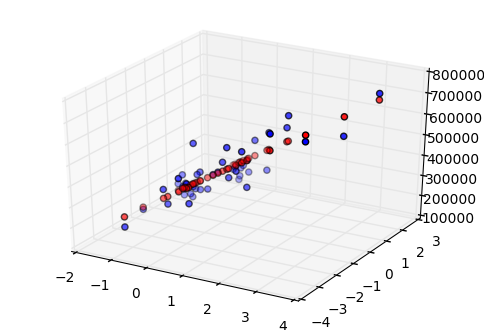

In [15]:
theta=result.x
ax=plt.subplot(111,projection='3d')
ax.scatter(X_normal[:,1],X_normal[:,2],y)
h=hypothesis(theta,X_normal)
ax.scatter(X_normal[:,1],X_normal[:,2],h,c='r')

## 多项式回归
其实很多时候，我们并没有那么幸运，正好所有的数据之间都是线性关系，能用一条直线，一个平面就描述地出来，大多数时候，我们可能需要画成曲线、曲面或者曲啥更高维度的东西……此时，我们可以用多项式回归来表示，公式是：  
$h_{\theta}(x) = \theta _{0}+\theta _{1}x+\theta _{2}x^2+\theta _{3}x^3+……$  
此时，我们可以用Andrew Ng在Coursera上的[机器学习](https://www.coursera.org/learn/machine-learning/)上一张的视频截图来了解，这是一个房子的大小和房价之间的关系：  
![多项式回归](./多项式回归.png)  
从图中我们可以看出，Andrew Ng分别尝试了用二次方程（蓝色的线）和三次方程（绿色的线）来拟合这些点，但是二次方程有个缺点，到了后面，反而会下降，这和我们的认知不符合，而三次方程不会遇到这个问题，所以最后选择了三次方程。其实，我们可以把次数设置得高一些，大不了训练（优化）完了后后面几个高阶的$\theta$特别小呗，不过这里有个陷阱，叫做过拟合，这个非常重要，但是以后再说。  
其实，我们还能从另一个角度来理解问题，我们可以把多项式回归看成是另类的多变量线性回归，我们分别来看一下公式：  
$h_{\theta}(x) = \theta _{0}+\theta _{1}x+\theta _{2}x^2+\theta _{3}x^3$  
$h_{\theta}(x) = \theta _{0}+\theta _{1}x_{1}+\theta _{2}x_{2}+\theta _{3}x_{3}$  
如果我们把$x_{1}=x$，$x_{2}=x^2$，$x_{3}=x^3$，这不就是一个线性回归吗？只是，这一次的维度有多少你说了算，高阶维度的数据需要你来亲自构建。  
当然，咱们在构建特征的时候不能太死板，可以尝试不同的构建方法，比如，在我的专业范围内，给功放建模通常是这样构建的：  
$h_{\theta}(x) = \theta _{0}+\theta _{1}x+\theta _{2}\left | x \right |x+\theta _{3}\left | x \right |^2x$  
找到一个适合的构建特征的方法（建模），拟合的效果会好很多。  
同时还要强调一点，在多项式回归的时候，特征缩放更加重要，你想啊，$x$的范围是1-100的话，$x^2$的范围就是1-10000，$x^3$的范围就是1-1000000！！


## 总结
这次，主要讲了多变量线性回归、特征缩放、以及一种可以看成特殊的多变量线性回归——多项式回归，同时，我们要修改上一次流程了：  
**设计预测函数----->设计代价函数----->特征缩放----->优化代价函数**